 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [153]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import json
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [154]:
#json.dumps(getQuotes('AAPL'), indent=2)

In [155]:
# Reading whale returns
whale_csvpath = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_csvpath)
whale_returns_df.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098

In [156]:
# data types
whale_returns_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [157]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [158]:
# records with Zeros equivalent to NA convert to NaN
#whale_returns_df.replace(0,np.nan, inplace = True)
#whale_returns_df.isnull().sum()

In [159]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [160]:
# Set the date as the index to the DataFrame
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                    
2015-03-03  2015-03-03                  -0.001266           -0.004981   
2015-03-04  2015-03-04                   0.002230            0.003241   
2015-03-05  2015-03-05                   0.004016            0.004076   
2015-03-06  2015-03-06                  -0.007905           -0.003574   
2015-03-09  2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [161]:
# Drop the extra date column
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [162]:
# Reading algorithmic returns
algo_csvpath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_csvpath)
algo_returns_df.head()

Date    Algo 1  Algo 2
0  2014-05-28  0.001745     NaN
1  2014-05-29  0.003978     NaN
2  2014-05-30  0.004464     NaN
3  2014-06-02  0.005692     NaN
4  2014-06-03  0.005292     NaN

In [163]:
# data types
algo_returns_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [164]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [165]:
# records with Zeros equivalent to NA convert to NaN
#algo_returns_df.replace(0,np.nan, inplace = True)
#algo_returns_df.isnull().sum()

In [166]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [167]:
# Set the date as the index to the DataFrame
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.head()

Date    Algo 1    Algo 2
Date                                      
2014-06-05  2014-06-05  0.004062  0.013285
2014-06-06  2014-06-06  0.001857  0.008284
2014-06-09  2014-06-09 -0.005012  0.005668
2014-06-10  2014-06-10  0.004406 -0.000735
2014-06-11  2014-06-11  0.004760 -0.003761

In [168]:
# Drop the extra date column
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [169]:
# Reading S&P TSX 60 Closing Prices
sptsx_csvpath = Path("Resources/sp_tsx_history.csv")
sptsx_df = pd.read_csv(sptsx_csvpath)
sptsx_df.head()

Date       Close
0  1-Oct-2012  $12,370.19
1  2-Oct-2012  $12,391.23
2  3-Oct-2012  $12,359.47
3  4-Oct-2012  $12,447.68
4  5-Oct-2012  $12,418.99

In [170]:
# Check Data Types
sptsx_df.dtypes

Date     object
Close    object
dtype: object

In [171]:
# Count nulls
sptsx_df.isnull().sum()

Date     0
Close    0
dtype: int64

In [172]:
# records with Zeros equivalent to NA convert to NaN
#sptsx_df.replace(0,np.nan, inplace = True)
#sptsx_df.isnull().sum()

In [173]:
# Fix Data Types
sptsx_df['Close'] = sptsx_df['Close'].str.replace('$','',regex = True)
sptsx_df['Close'] = sptsx_df['Close'].str.replace(',','',regex = True)
sptsx_df['Close'] = sptsx_df['Close'].astype('float')
sptsx_df.dtypes

Date      object
Close    float64
dtype: object

In [174]:
# Set the date as the index to the DataFrame
sptsx_df.set_index(pd.to_datetime(sptsx_df['Date'], infer_datetime_format=True), inplace=True)
sptsx_df.head()

Date     Close
Date                            
2012-10-01  1-Oct-2012  12370.19
2012-10-02  2-Oct-2012  12391.23
2012-10-03  3-Oct-2012  12359.47
2012-10-04  4-Oct-2012  12447.68
2012-10-05  5-Oct-2012  12418.99

In [175]:
# Drop the extra date column
sptsx_df.drop(columns=['Date'], inplace=True)
sptsx_df.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [176]:
# Calculate Daily Returns
sptsx_dailyreturns = sptsx_df.pct_change()
sptsx_dailyreturns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [177]:
# Drop nulls
sptsx_dailyreturns.dropna(inplace = True)
sptsx_dailyreturns.head()

Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

In [178]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_df = sptsx_df.rename(columns={"Close":"S&P Close"})
sptsx_dailyreturns = sptsx_dailyreturns.rename(columns={"Close":"S&P Returns"})
sptsx_dailyreturns.head()
#sptsx_df.head()

S&P Returns
Date                   
2012-10-02     0.001701
2012-10-03    -0.002563
2012-10-04     0.007137
2012-10-05    -0.002305
2012-10-09    -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [179]:
#Visualise Whale Data Frame
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [180]:
#Visualise Algorithmic Data Frame
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

In [181]:
#Visualise S&P TSX 60 Dataframe
sptsx_dailyreturns.head()

S&P Returns
Date                   
2012-10-02     0.001701
2012-10-03    -0.002563
2012-10-04     0.007137
2012-10-05    -0.002305
2012-10-09    -0.011709

In [182]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dfreturns = pd.concat([whale_returns_df, algo_returns_df, sptsx_dailyreturns], axis="columns", join="inner")
combined_dfreturns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  S&P Returns  
Date                               
2015-03-03 -0.000949    -0.008530  
2015-03-04  0.002416    -0.003371  
2015-03-05  0.004323     0.001344  
2015-03-06 -0.011460    -0.009972  
2015-03-09  0.001303    -0.006555  
...              ...          ...  
2019-04-25 -0.007247    -0.000628  
2019-04-26  0.005256     0.002254  
2019-04-29  0.002829    -0.000788  
2019-04-30 -0.001570    -0.001183  
2019-05-01 -0.007358    -0.004703  

[1029 rows x 7 columns]

---

In [183]:
# Save modified DataFrame to the Resources folder. Use the `index` parameter set to `False` to exclude saving the index.
combined_dfreturns.to_csv("Resources/combined_cleansed.csv", index=True)

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [184]:
# # Reading whale returns
# combined_csvpath = Path("Resources/combined_cleansed.csv")
# combined_df = pd.read_csv(combined_csvpath)
# combined_df.head()

<AxesSubplot:xlabel='Date'>

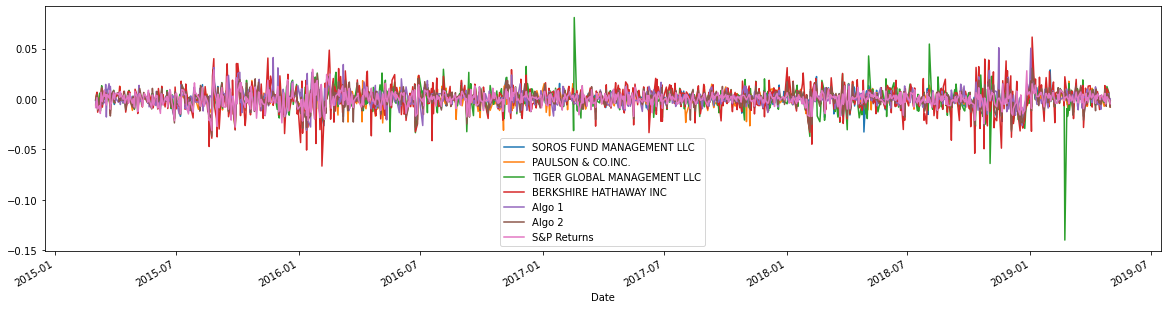

In [185]:
# Plot daily returns of all portfolios
combined_dfreturns.plot(figsize = (20,5))


#### Calculate and Plot cumulative returns.

In [186]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_dfreturns).cumprod()-1
cumulative_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-03-05                    -0.000681                0.004327 -0.011459   
2015-03-06                    -0.009156               -0.008828 -0.016359   
2015-03-09                    -0.003367               -0.010466 -0.021717   

              Algo 2  S&P Returns  
Date                               
2015-03-03 -0.000949    -0.008530  
2015-03-04  0.001464    -0.011872  
2015-03-05  0.005794    -0.010544  
2015-03-06 -0.005733    -0.020411  
2015-03-09 -0.004437    -0.026832

<AxesSubplot:xlabel='Date'>

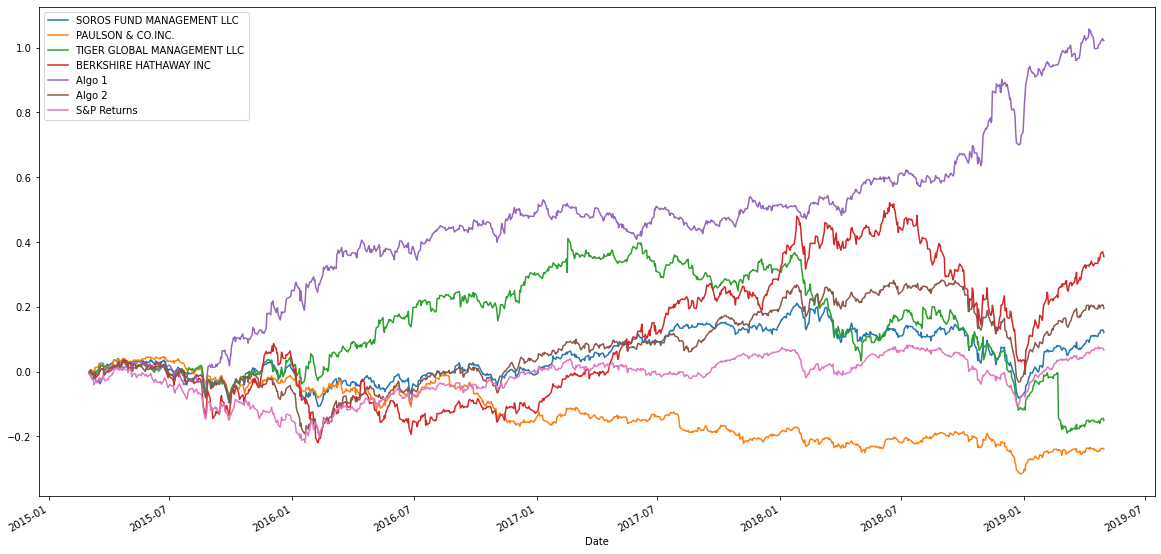

In [187]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

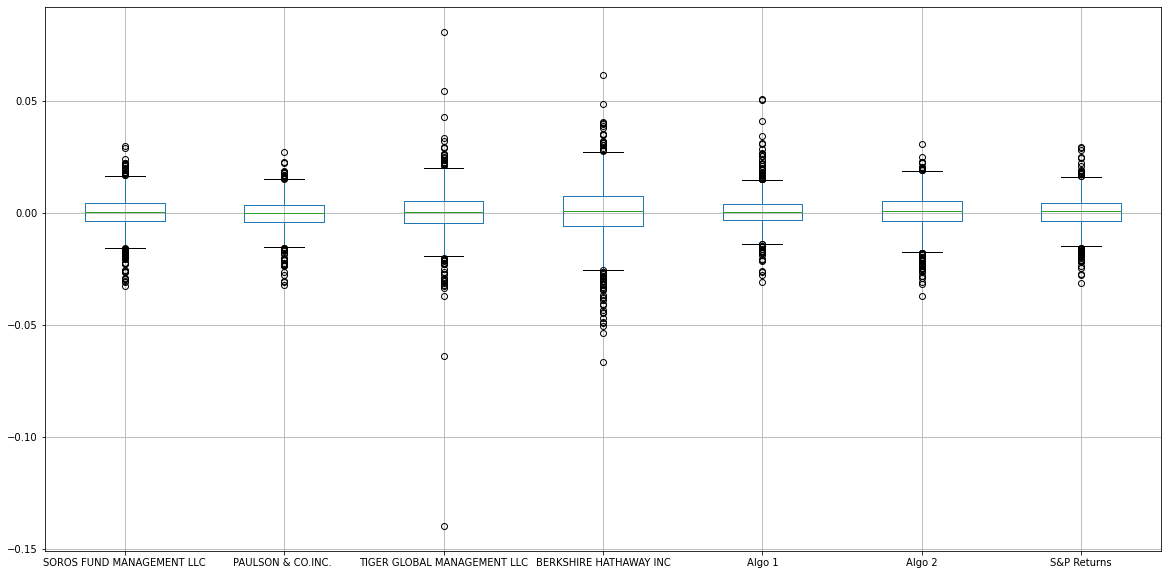

In [188]:
# Box plot to visually show risk
combined_dfreturns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [189]:
# Calculate daily standard deviations of all portfolios
combined_dfreturns.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P Returns                    0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [190]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
combined_dfreturns.std() > combined_dfreturns["S&P Returns"].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P Returns                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [191]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_dfreturns.std() * np.sqrt(252)
volatility = volatility.sort_values()
volatility

PAULSON & CO.INC.              0.110841
S&P Returns                    0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [192]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_dfreturns.rolling(window=21).std()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                          NaN                     NaN       NaN   
2015-03-05                          NaN                     NaN       NaN   
2015-03-06                          NaN                     NaN       NaN   
2015-03-09                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-04-25                     0.004917                0.006641  0.005801   
2019-04-26                     0.005424                0.006599  0.005562   
2019-04-29                     0.005438                0.006584  0.005251   
2019-04-30                     0.005419                0.006323  0.005294   
2019-05-01                     0.005744                0.006143  0.004972   

              Algo 2  S&P Returns  
Date                               
2015-03-03       NaN          NaN  
2015-03-04       NaN          NaN  
2015-03-05       NaN          NaN  
2015-03-06       NaN          NaN  
2015-03-09       NaN          NaN  
...              ...          ...  
2019-04-25  0.005764     0.003370  
2019-04-26  0.005700     0.003321  
2019-04-29  0.005622     0.003356  
2019-04-30  0.005600     0.003240  
2019-05-01  0.005686     0.003150  

[1029 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

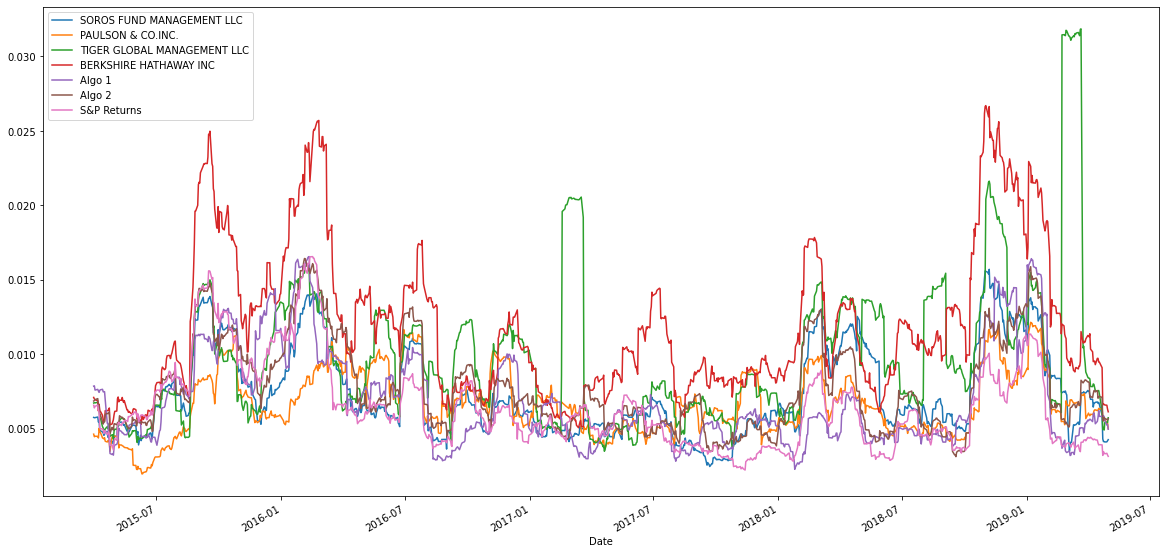

In [193]:
# Plot the rolling standard deviation
combined_dfreturns.rolling(window=21).std().plot(figsize=(20,10))

In [194]:
### Calculate and plot the correlation
# Calculate the correlation for each portfolio
correlation = combined_dfreturns.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P Returns                                   0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
S&P Returns                                     0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
S&P Returns                                0.557250  0.310276  0.737370   

                             S&P Returns  
SOROS FUND MANAGEMENT LLC       0.673930  
PAULSON & CO.INC.               0.486511  
TIGER GLOBAL MANAGEMENT LLC     0.440583  
BERKSHIRE HATHAWAY INC          0.557250  
Algo 1                          0.310276  
Algo 2                          0.737370  
S&P Returns                     1.000000

<AxesSubplot:>

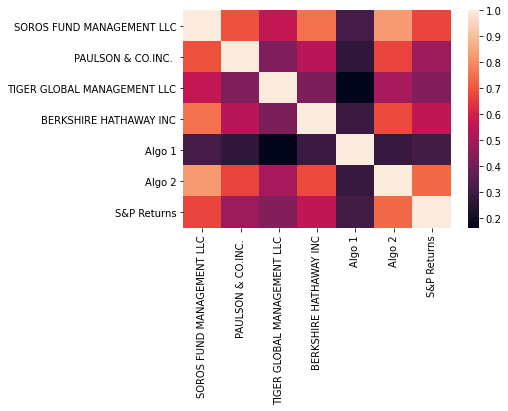

In [195]:
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [196]:
# Calculate covariance of a single portfolio - Whale Returns
soros_covariance = combined_dfreturns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_dfreturns['S&P Returns'])
soros_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000014
2019-04-26    0.000014
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000014
Length: 1029, dtype: float64

In [197]:
# Calculate variance of S&P TSX
tsx_variance = combined_dfreturns['S&P Returns'].rolling(window=60).var()
tsx_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P Returns, Length: 1029, dtype: float64

In [198]:
# Computing beta
beta = soros_covariance / tsx_variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.913204
2019-04-26    0.918302
2019-04-29    0.844689
2019-04-30    0.893528
2019-05-01    0.939908
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

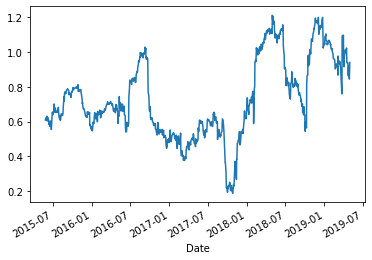

In [199]:
# Plot beta trend
#eta = soros_covariance / tsx_variance
beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [200]:
# Use `ewm` to calculate the rolling window
combined_dfreturns.ewm(halflife = 21).mean()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000511            0.000673   
...                               ...                 ...   
2019-04-25                   0.001277            0.000032   
2019-04-26                   0.001500            0.000329   
2019-04-29                   0.001492            0.000406   
2019-04-30                   0.001402            0.000321   
2019-05-01                   0.001167            0.000268   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.001532               -0.001089 -0.005320   
2015-03-05                    -0.000193                0.001603 -0.003817   
2015-03-06                    -0.002369               -0.002256 -0.004116   
2015-03-09                    -0.000616               -0.002128 -0.004400   
...                                 ...                     ...       ...   
2019-04-25                    -0.001058                0.001860  0.000625   
2019-04-26                    -0.000622                0.002138  0.000702   
2019-04-29                    -0.000399                0.002238  0.000848   
2019-04-30                    -0.000395                0.002046  0.000725   
2019-05-01                    -0.000639                0.001725  0.000704   

              Algo 2  S&P Returns  
Date                               
2015-03-03 -0.000949    -0.008530  
2015-03-04  0.000761    -0.005908  
2015-03-05  0.001988    -0.003410  
2015-03-06 -0.001542    -0.005133  
2015-03-09 -0.000935    -0.005436  
...              ...          ...  
2019-04-25  0.000876     0.001018  
2019-04-26  0.001018     0.001058  
2019-04-29  0.001077     0.000998  
2019-04-30  0.000991     0.000927  
2019-05-01  0.000720     0.000745  

[1029 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [201]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_dfreturns.mean()* 252) / (combined_dfreturns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P Returns                    0.195550
dtype: float64

<AxesSubplot:>

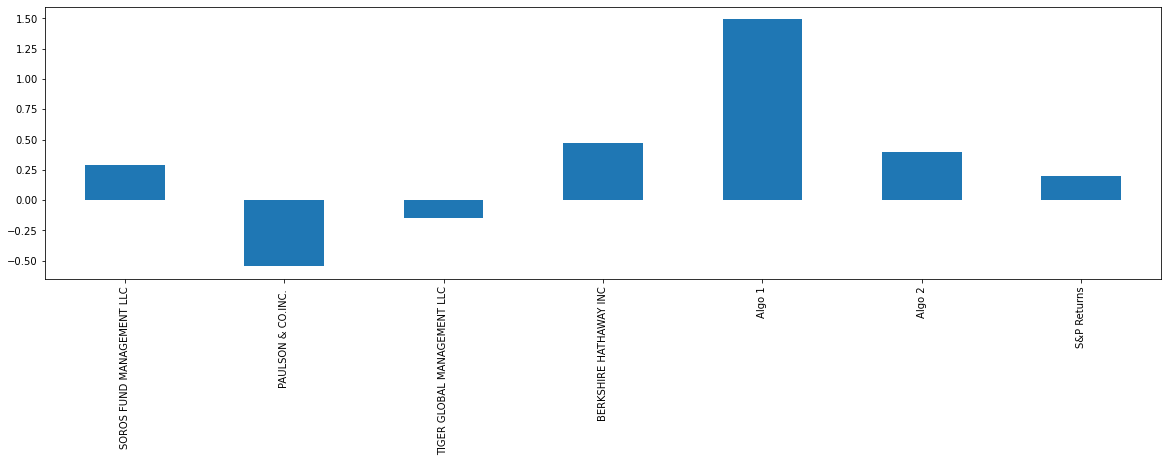

In [202]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize=(20,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [207]:
# Reading data from 1st stock
l_csvpath = "Resources/l_historical.csv"
l_df = pd.read_csv(l_csvpath)

In [208]:
# Reset Date index
l_df.set_index (pd.to_datetime(l_df['Date'], infer_datetime_format=True), inplace=True)

In [208]:
#Drop additional columns
l_df.drop(columns=['Date'], inplace=True)
l_df.drop(columns=['Symbol'], inplace=True)

In [208]:
#Rename columns
l_df = l_df.rename(columns={"Close":"L"})

In [208]:
# Extracting data only for 2019
oneyr_l_df = l_df.loc['2019-01-01':'2019-12-31', :]

In [209]:
# Calculate daily returns
one_l_ret = oneyr_l_df.pct_change()

In [210]:
# Drop NAs
one_l_ret.dropna(inplace = True)

In [211]:
# Display sample data
one_l_ret.head(-1)

L
Date                
2019-01-03 -0.006224
2019-01-04  0.002143
2019-01-07  0.009375
2019-01-08  0.007821
2019-01-09  0.010186
...              ...
2019-12-19 -0.016284
2019-12-20  0.003547
2019-12-23 -0.003240
2019-12-24 -0.000148
2019-12-27  0.001626

[248 rows x 1 columns]

In [212]:
# Reading data from 2nd stock
otex_csvpath = "Resources/otex_historical.csv"
otex_df = pd.read_csv(otex_csvpath)

In [213]:
# Reset Date index
otex_df.set_index (pd.to_datetime(otex_df['Date'], infer_datetime_format=True), inplace=True)

In [213]:
# Dropping extra columns
otex_df.drop(columns=['Date'], inplace=True)
otex_df.drop(columns=['Symbol'], inplace=True)

In [213]:
# Rename columns
otex_df = otex_df.rename(columns={"Close":"Otex"})

In [213]:
# Extracting data only for 2019
oneyr_otex_df = otex_df.loc['2019-01-01':'2019-12-31', :]

In [214]:
# Calculate daily returns
one_otex_ret = oneyr_otex_df.pct_change()

In [215]:
# Drop NAs
one_otex_ret.dropna(inplace = True)

In [216]:
# Display sample data
one_otex_ret.head(-1)

Otex
Date                
2019-01-03 -0.036549
2019-01-04  0.017908
2019-01-07  0.008565
2019-01-08  0.028001
2019-01-09  0.008707
...              ...
2019-12-19 -0.003826
2019-12-20  0.024441
2019-12-23 -0.013463
2019-12-24 -0.007773
2019-12-27  0.004526

[248 rows x 1 columns]

In [217]:
# Reading data from 3rd stock
shop_csvpath = "Resources/l_historical.csv"
shop_df = pd.read_csv(shop_csvpath)

In [218]:
# Reset Date index
shop_df.set_index (pd.to_datetime(shop_df['Date'], infer_datetime_format=True), inplace=True)

In [218]:
# Drop extra columns
shop_df.drop(columns=['Date'], inplace=True)
shop_df.drop(columns=['Symbol'], inplace=True)

In [218]:
# Rename columns
shop_df = shop_df.rename(columns={"Close":"Shop"})

In [218]:
# Extract data for 2019
oneyr_shop_df = shop_df.loc['2019-01-01':'2019-12-31', :]

In [219]:
# Calculate daily returns
one_shop_ret = oneyr_shop_df.pct_change()

In [220]:
# Drop NAs
one_shop_ret.dropna(inplace = True)

In [221]:
# Display sample data
one_shop_ret.head(-1)

Shop
Date                
2019-01-03 -0.006224
2019-01-04  0.002143
2019-01-07  0.009375
2019-01-08  0.007821
2019-01-09  0.010186
...              ...
2019-12-19 -0.016284
2019-12-20  0.003547
2019-12-23 -0.003240
2019-12-24 -0.000148
2019-12-27  0.001626

[248 rows x 1 columns]

In [222]:
# Combine all stocks in a single Dataframe
combined_stocks = pd.concat([otex_df, shop_df, l_df], axis = "columns", join="inner")
combined_stocks.head(-1)

Otex   Shop      L
Date                           
2018-01-02  43.58  57.99  57.99
2018-01-03  43.07  57.41  57.41
2018-01-04  42.91  57.42  57.42
2018-01-05  42.57  57.42  57.42
2018-01-08  42.16  56.86  56.86
...           ...    ...    ...
2019-12-19  57.28  67.66  67.66
2019-12-20  58.68  67.90  67.90
2019-12-23  57.89  67.68  67.68
2019-12-24  57.44  67.67  67.67
2019-12-27  57.70  67.78  67.78

[500 rows x 3 columns]

In [223]:
#Filtering 1 yr data for the remaining portfolios
oneyr_combined_df = combined_dfreturns.loc['2019-01-01':'2019-12-31', :]
oneyr_combined_df.head(-1)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-01-02                   0.006027            0.015429   
2019-01-03                  -0.007848           -0.007403   
2019-01-04                   0.029881            0.027032   
2019-01-07                   0.009051            0.014475   
2019-01-08                   0.010760            0.008050   
...                               ...                 ...   
2019-04-24                   0.002284            0.001009   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-01-02                     0.007881               -0.001554  0.050342   
2019-01-03                    -0.008478               -0.032053  0.015246   
2019-01-04                     0.033560                0.061341  0.017622   
2019-01-07                     0.014111                0.017185  0.014748   
2019-01-08                     0.001544                0.005851  0.010825   
...                                 ...                     ...       ...   
2019-04-24                    -0.004000               -0.006386  0.001095   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   

              Algo 2  S&P Returns  
Date                               
2019-01-02  0.018022     0.001697  
2019-01-03 -0.011792    -0.009368  
2019-01-04  0.030509     0.015048  
2019-01-07  0.016942     0.005373  
2019-01-08  0.010479     0.006965  
...              ...          ...  
2019-04-24  0.000399    -0.004972  
2019-04-25 -0.007247    -0.000628  
2019-04-26  0.005256     0.002254  
2019-04-29  0.002829    -0.000788  
2019-04-30 -0.001570    -0.001183  

[82 rows x 7 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [224]:
# Combine all stocks in a single DataFrame
combined_stocks_ret = pd.concat([one_l_ret, one_otex_ret, one_shop_ret], axis = "columns", join="inner")

In [225]:
# Display sample data
combined_stocks_ret

L      Otex      Shop
Date                                    
2019-01-03 -0.006224 -0.036549 -0.006224
2019-01-04  0.002143  0.017908  0.002143
2019-01-07  0.009375  0.008565  0.009375
2019-01-08  0.007821  0.028001  0.007821
2019-01-09  0.010186  0.008707  0.010186
...              ...       ...       ...
2019-12-20  0.003547  0.024441  0.003547
2019-12-23 -0.003240 -0.013463 -0.003240
2019-12-24 -0.000148 -0.007773 -0.000148
2019-12-27  0.001626  0.004526  0.001626
2019-12-30 -0.006639 -0.008839 -0.006639

[249 rows x 3 columns]

In [226]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [227]:
# Calculating Mean returns for Stocks
mean_daily_returns = combined_stocks_ret.mean()
mean_daily_returns

L       0.000426
Otex    0.001118
Shop    0.000426
dtype: float64

In [228]:
# Calculate portfolio return
weighted_port_returns = combined_stocks_ret.dot(weights)
weighted_port_returns

Date
2019-01-03   -0.016333
2019-01-04    0.007398
2019-01-07    0.009105
2019-01-08    0.014548
2019-01-09    0.009693
                ...   
2019-12-20    0.010512
2019-12-23   -0.006648
2019-12-24   -0.002690
2019-12-27    0.002593
2019-12-30   -0.007372
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [229]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = pd.concat([weighted_port_returns, combined_dfreturns], axis = "columns", join="inner")
combined_returns.rename(columns={0:"Custom Portfolio"}, inplace=True)
combined_returns

Custom Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                          
2019-01-03         -0.016333                  -0.007848           -0.007403   
2019-01-04          0.007398                   0.029881            0.027032   
2019-01-07          0.009105                   0.009051            0.014475   
2019-01-08          0.014548                   0.010760            0.008050   
2019-01-09          0.009693                   0.008630           -0.000800   
...                      ...                        ...                 ...   
2019-04-25          0.007007                  -0.000285           -0.001291   
2019-04-26         -0.002190                   0.008149            0.009162   
2019-04-29         -0.000115                   0.001254            0.002719   
2019-04-30          0.003590                  -0.001295           -0.002211   
2019-05-01         -0.012003                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-01-03                    -0.008478               -0.032053  0.015246   
2019-01-04                     0.033560                0.061341  0.017622   
2019-01-07                     0.014111                0.017185  0.014748   
2019-01-08                     0.001544                0.005851  0.010825   
2019-01-09                    -0.000534                0.019788  0.000214   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  S&P Returns  
Date                               
2019-01-03 -0.011792    -0.009368  
2019-01-04  0.030509     0.015048  
2019-01-07  0.016942     0.005373  
2019-01-08  0.010479     0.006965  
2019-01-09  0.009658     0.013665  
...              ...          ...  
2019-04-25 -0.007247    -0.000628  
2019-04-26  0.005256     0.002254  
2019-04-29  0.002829    -0.000788  
2019-04-30 -0.001570    -0.001183  
2019-05-01 -0.007358    -0.004703  

[82 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [230]:
# Calculating Mean returns for all portfolios
combined_returns.mean().sort_values()

TIGER GLOBAL MANAGEMENT LLC   -0.000394
PAULSON & CO.INC.              0.001059
Custom Portfolio               0.001142
Algo 1                         0.001254
S&P Returns                    0.001679
Algo 2                         0.002164
SOROS FUND MANAGEMENT LLC      0.002232
BERKSHIRE HATHAWAY INC         0.003369
dtype: float64

In [231]:
# Calculate the annualized `std`
# Using (252 trading days)
custom_port_volatility = combined_returns.std() * np.sqrt(252)
custom_port_volatility.sort_values()


S&P Returns                    0.072113
Algo 1                         0.088197
PAULSON & CO.INC.              0.107596
Custom Portfolio               0.108668
SOROS FUND MANAGEMENT LLC      0.115762
Algo 2                         0.119742
BERKSHIRE HATHAWAY INC         0.199159
TIGER GLOBAL MANAGEMENT LLC    0.280624
dtype: float64

In [232]:
### Calculate and plot rolling `std` with 21-day window
# Calculate rolling standard deviation
# using a 21-day window
combined_returns.rolling(window=21).std()

Custom Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                          
2019-01-03               NaN                        NaN                 NaN   
2019-01-04               NaN                        NaN                 NaN   
2019-01-07               NaN                        NaN                 NaN   
2019-01-08               NaN                        NaN                 NaN   
2019-01-09               NaN                        NaN                 NaN   
...                      ...                        ...                 ...   
2019-04-25          0.005848                   0.004145            0.005572   
2019-04-26          0.005637                   0.004117            0.005649   
2019-04-29          0.005113                   0.004123            0.005374   
2019-04-30          0.004878                   0.004199            0.005408   
2019-05-01          0.005529                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-01-03                          NaN                     NaN       NaN   
2019-01-04                          NaN                     NaN       NaN   
2019-01-07                          NaN                     NaN       NaN   
2019-01-08                          NaN                     NaN       NaN   
2019-01-09                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-04-25                     0.004917                0.006641  0.005801   
2019-04-26                     0.005424                0.006599  0.005562   
2019-04-29                     0.005438                0.006584  0.005251   
2019-04-30                     0.005419                0.006323  0.005294   
2019-05-01                     0.005744                0.006143  0.004972   

              Algo 2  S&P Returns  
Date                               
2019-01-03       NaN          NaN  
2019-01-04       NaN          NaN  
2019-01-07       NaN          NaN  
2019-01-08       NaN          NaN  
2019-01-09       NaN          NaN  
...              ...          ...  
2019-04-25  0.005764     0.003370  
2019-04-26  0.005700     0.003321  
2019-04-29  0.005622     0.003356  
2019-04-30  0.005600     0.003240  
2019-05-01  0.005686     0.003150  

[82 rows x 8 columns]

<AxesSubplot:xlabel='Date'>

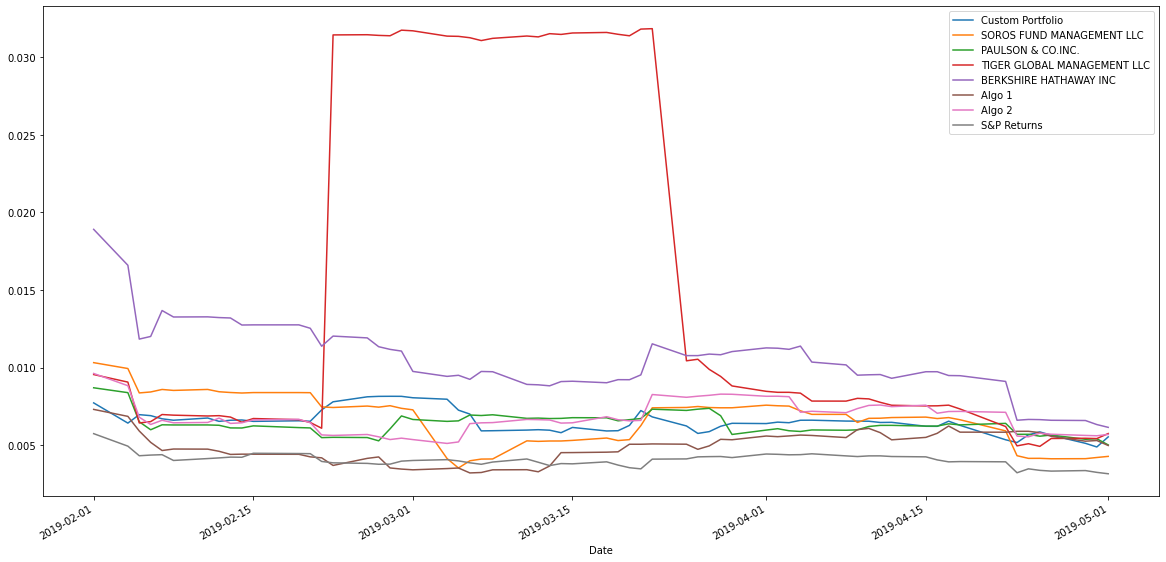

In [233]:
# Plot rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [234]:
### Calculate and plot the correlation
# Calculate the correlation for each portfolio
custom_correlation = combined_returns.corr()
custom_correlation

Custom Portfolio  SOROS FUND MANAGEMENT LLC  \
Custom Portfolio                     1.000000                   0.381111   
SOROS FUND MANAGEMENT LLC            0.381111                   1.000000   
PAULSON & CO.INC.                    0.153058                   0.751013   
TIGER GLOBAL MANAGEMENT LLC          0.285013                   0.363262   
BERKSHIRE HATHAWAY INC               0.311702                   0.742055   
Algo 1                               0.185708                   0.099731   
Algo 2                               0.244018                   0.807354   
S&P Returns                          0.430997                   0.656081   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Custom Portfolio                       0.153058                     0.285013   
SOROS FUND MANAGEMENT LLC              0.751013                     0.363262   
PAULSON & CO.INC.                      1.000000                     0.278640   
TIGER GLOBAL MANAGEMENT LLC            0.278640                     1.000000   
BERKSHIRE HATHAWAY INC                 0.618352                     0.144963   
Algo 1                                 0.156997                     0.029891   
Algo 2                                 0.731323                     0.207660   
S&P Returns                            0.448598                     0.258661   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
Custom Portfolio                           0.311702  0.185708  0.244018   
SOROS FUND MANAGEMENT LLC                  0.742055  0.099731  0.807354   
PAULSON & CO.INC.                          0.618352  0.156997  0.731323   
TIGER GLOBAL MANAGEMENT LLC                0.144963  0.029891  0.207660   
BERKSHIRE HATHAWAY INC                     1.000000  0.174493  0.772924   
Algo 1                                     0.174493  1.000000  0.126729   
Algo 2                                     0.772924  0.126729  1.000000   
S&P Returns                                0.662842  0.103660  0.707503   

                             S&P Returns  
Custom Portfolio                0.430997  
SOROS FUND MANAGEMENT LLC       0.656081  
PAULSON & CO.INC.               0.448598  
TIGER GLOBAL MANAGEMENT LLC     0.258661  
BERKSHIRE HATHAWAY INC          0.662842  
Algo 1                          0.103660  
Algo 2                          0.707503  
S&P Returns                     1.000000

<AxesSubplot:>

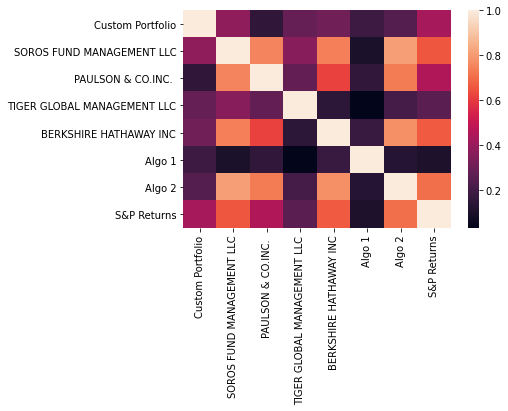

In [235]:
# Display de correlation matrix
sns.heatmap(custom_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [236]:
### Calculate and plot Beta
# Calculate covariance of the custom portfolio
custom_port_covariance = combined_returns['Custom Portfolio'].rolling(window=60).cov(combined_returns['S&P Returns'])
custom_port_covariance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-25    0.000008
2019-04-26    0.000008
2019-04-29    0.000008
2019-04-30    0.000009
2019-05-01    0.000009
Length: 82, dtype: float64

In [237]:
# Calculate variance of S&P TSX
tsx60_variance = combined_returns['S&P Returns'].rolling(window=60).var()
tsx60_variance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P Returns, Length: 82, dtype: float64

In [238]:
# Computing beta
custom_beta = custom_port_covariance / tsx60_variance
custom_beta

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-25    0.561396
2019-04-26    0.558096
2019-04-29    0.542787
2019-04-30    0.602257
2019-05-01    0.622068
Length: 82, dtype: float64

In [239]:
# Average beta value in the rolling period
custom_beta.mean()

0.4946735058818805

<AxesSubplot:xlabel='Date'>

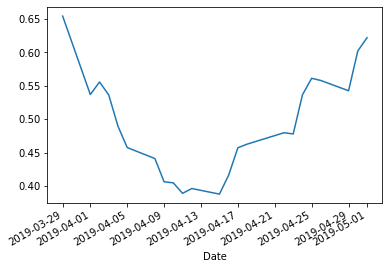

In [240]:
# Plot beta trend
custom_beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [241]:
### Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
custom_sharpe_ratios = (combined_returns.mean()* 252) / (combined_returns.std() * np.sqrt(252)).sort_values()
custom_sharpe_ratios

Algo 1                         3.582457
Algo 2                         4.555069
BERKSHIRE HATHAWAY INC         4.262676
Custom Portfolio               2.648466
PAULSON & CO.INC.              2.479188
S&P Returns                    5.865641
SOROS FUND MANAGEMENT LLC      4.859864
TIGER GLOBAL MANAGEMENT LLC   -0.354035
dtype: float64

<AxesSubplot:>

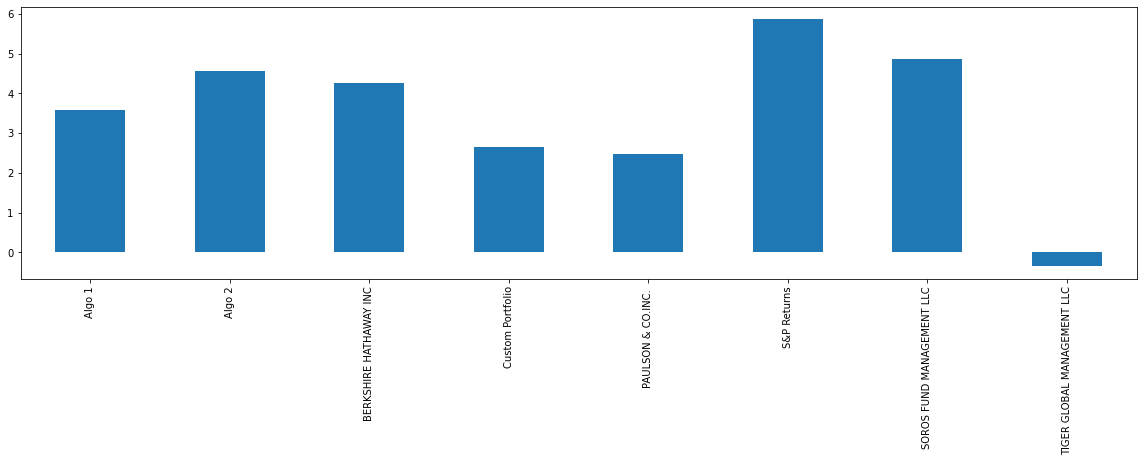

In [242]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind = 'bar', figsize=(20,5))

### How does your portfolio do?

Write your answer here!

Portfolio Analysis - Custom Portfolio v/s Other Portfolios and S&P TSX 60

The custom portfolio represented by the stock returns of Loblaws(L), Open Text Corp(OTEX) and Shopify(SHOP), with its returns weighted equally, has the following observations...

The Custom Portfolio shows a low correlation with all the other portfolios, and a weak but positive correlation with the S&P TSX 60.

In terms of Volatility, the Custom Portfolio has one of the lesser volatilities compared to the others, except the S&P TSX 60, Algo 1 and Paulson. In other words, the Custom Portfolio is more riskier than the S&P TSX 60.

The Custom Portfolio's beta with the S&P TSX 60 ranges between 0.4 - 0.7  through the year, with the mean of the beta close to 0.5, suggesting that the volatility of the portfolio with the TSX is almost  correlated with the market. 

When considering the Sharpe Ratio, the Custom Portfolio delivers a market beating performance, but the performance is lower all other portfolios except the Paulson Fund and the Tiger Global Fund. 

To summarize, the Custom Portfolio holds more risk per unit of return compared to the S&P TSX 60. However, it is possible that this performance is skewed towards the performance in 2019, as the underlying data bounds the data only to 2019. In the previous section of this, the Sharpe Ratios of the other portfolios were quite positive over a larger period of time, and significantly INVERSE when considering 2018. It is fair to say that the Custom Portfolio performed well, but beat only two portfolios... 
